***PROJECT-3*** :
**Heart Disease Prediction**

Importing Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import time

In [ ]:
df = pd.read_csv('/content/heart.csv')

Data Collection & Processing

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.shape

(918, 12)

In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


Note: no missing values

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


In [ ]:
# Get the summary statistics for categorical variables
df.describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


Exploratory data analysis (eda)

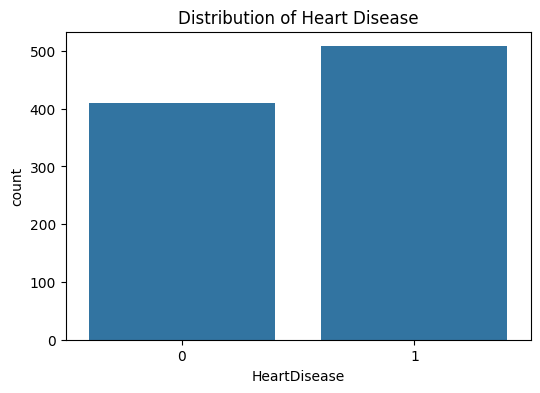

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribution of Heart Disease')
plt.show()

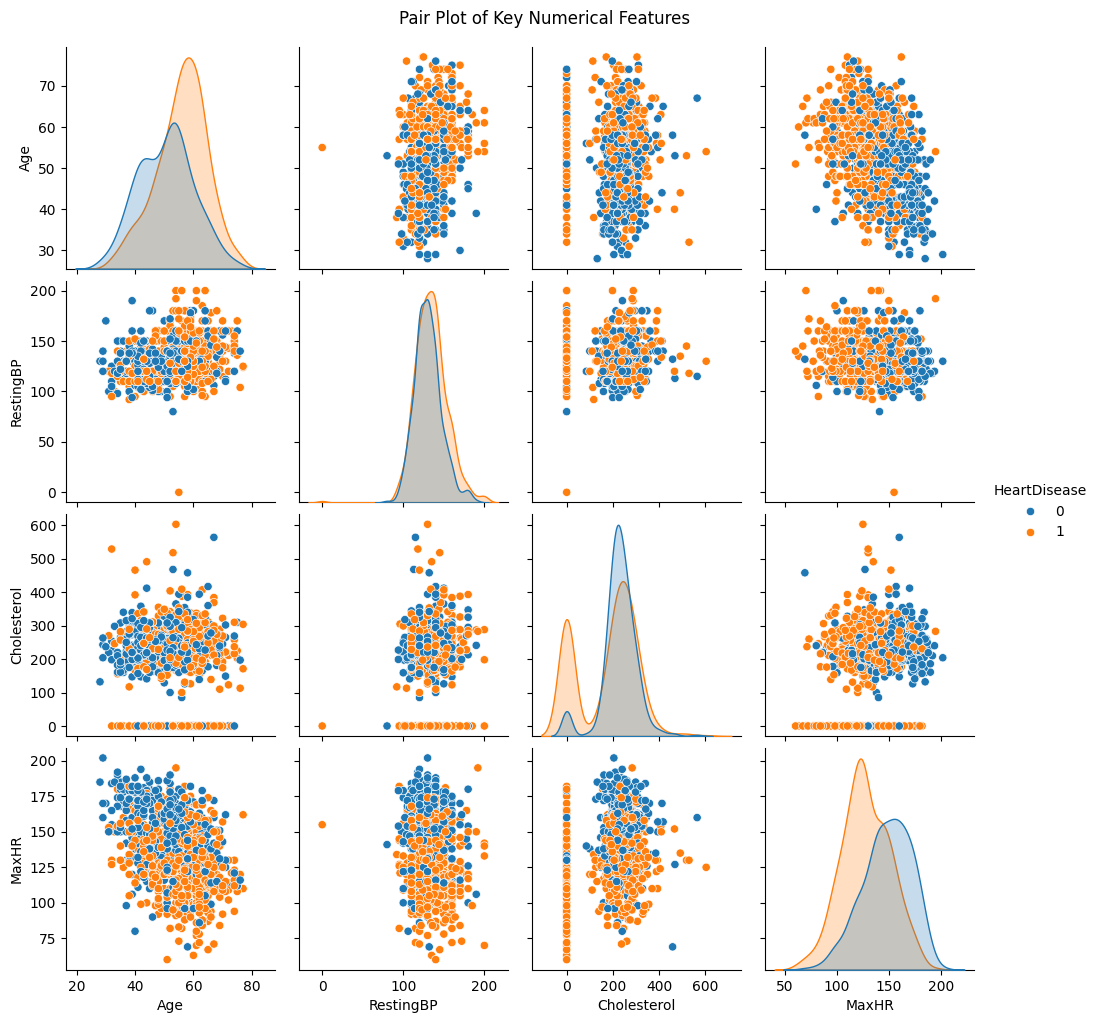

In [ ]:
sns.pairplot(df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'HeartDisease']], hue='HeartDisease')
plt.suptitle('Pair Plot of Key Numerical Features', y=1.02)
plt.show()

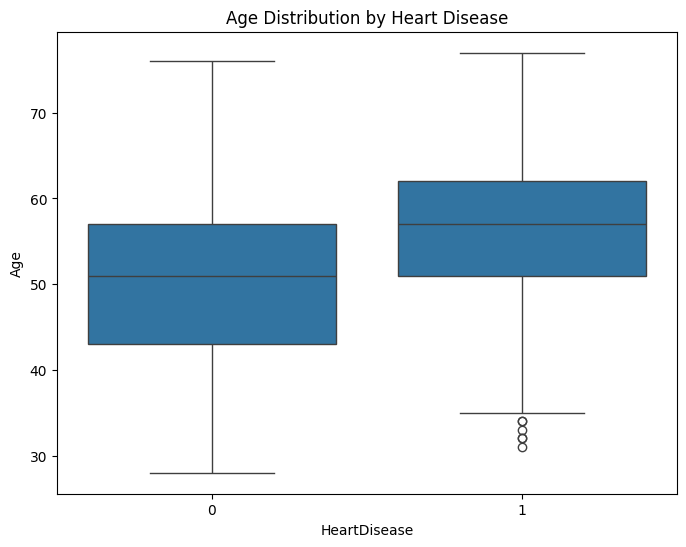

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='HeartDisease', y='Age', data=df)
plt.title('Age Distribution by Heart Disease')
plt.show()

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Encoding

In [ ]:
df[['Sex', 'RestingECG', 'ChestPainType', 'ExerciseAngina', 'ST_Slope']].value_counts()


Sex  RestingECG  ChestPainType  ExerciseAngina  ST_Slope
M    Normal      ASY            Y               Flat        109
                 ATA            N               Up           64
                 ASY            N               Flat         55
     ST          ASY            Y               Flat         49
     Normal      NAP            N               Up           46
                                                           ... 
     ST          ATA            N               Down          1
                 NAP            N               Down          1
                                Y               Down          1
                 TA             N               Down          1
                                Y               Flat          1
Name: count, Length: 95, dtype: int64

In [ ]:
#converting categorical columns
df.replace({'Sex' : {'M':0, 'F':1},'RestingECG' : {'Normal':0,'LVH':1,'ST':2}, 'ChestPainType':{'ASY':1, 'NAP':1, 'ATA':2, 'TA':3},'ExerciseAngina':{'N':0,'Y':1},'ST_Slope':{'Flat':0,'Up':1,'Down':2}}, inplace=True)

/tmp/ipython-input-3289556052.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Sex' : {'M':0, 'F':1},'RestingECG' : {'Normal':0,'LVH':1,'ST':2}, 'ChestPainType':{'ASY':1, 'NAP':1, 'ATA':2, 'TA':3},'ExerciseAngina':{'N':0,'Y':1},'ST_Slope':{'Flat':0,'Up':1,'Down':2}}, inplace=True)


In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,2,140,289,0,0,172,0,0.0,1,0
1,49,1,1,160,180,0,0,156,0,1.0,0,1
2,37,0,2,130,283,0,2,98,0,0.0,1,0
3,48,1,1,138,214,0,0,108,1,1.5,0,1
4,54,0,1,150,195,0,0,122,0,0.0,1,0


Splitting the data into train and test data

In [ ]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (734, 11)
X_test shape: (184, 11)
y_train shape: (734,)
y_test shape: (184,)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model training

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

results = {}

print("\n--- Model Training and Evaluation ---")
for name, model in models.items():
    print(f"\nTraining {name}...")
    start_time = time.time() # Start timing
    model.fit(X_train_scaled, y_train)
    end_time = time.time()   # End timing
    y_pred = model.predict(X_test_scaled)


--- Model Training and Evaluation ---

Training Logistic Regression...

Training K-Nearest Neighbors...

Training Support Vector Machine...

Training Decision Tree...

Training Random Forest...


Model Evalutaion

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

In [ ]:
#Store result
results = {}

# Logistic Regression
name = "Logistic Regression"
# train and evaluate model here...
results[name] = {
    'model': model,
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'confusion_matrix': cm,
    'classification_report': report,
    'training_time': end_time - start_time
}

# Random Forest
name = "Random Forest"
# train and evaluate model here...
results[name] = {
    'model': model,
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'confusion_matrix': cm,
    'classification_report': report,
    'training_time': end_time - start_time
}

# SVM
name = "SVM"
# train and evaluate model here...
results[name] = {
    'model': model,
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'confusion_matrix': cm,
    'classification_report': report,
    'training_time': end_time - start_time
}


In [ ]:
print(f"{name} Performance:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1-Score: {f1:.4f}")
print(f"  Training Time: {end_time - start_time:.4f} seconds")
print(f"  Confusion Matrix:\n{cm}")

SVM Performance:
  Accuracy: 0.8533
  Precision: 0.8469
  Recall: 0.8737
  F1-Score: 0.8601
  Training Time: 0.2213 seconds
  Confusion Matrix:
[[74 15]
 [12 83]]


Model Comparison

In [ ]:
print("\n--- Summary of Model Performances ---")
performance_df = pd.DataFrame.from_dict({
    name: {
        'Accuracy': res['accuracy'],
        'Precision': res['precision'],
        'Recall': res['recall'],
        'F1-Score': res['f1_score']

    } for name, res in results.items()
}, orient='index')
print("\nDataFrame used for plotting (should contain all models):")
print(performance_df)


--- Summary of Model Performances ---

DataFrame used for plotting (should contain all models):
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.853261   0.846939  0.873684  0.860104
Random Forest        0.853261   0.846939  0.873684  0.860104
SVM                  0.853261   0.846939  0.873684  0.860104


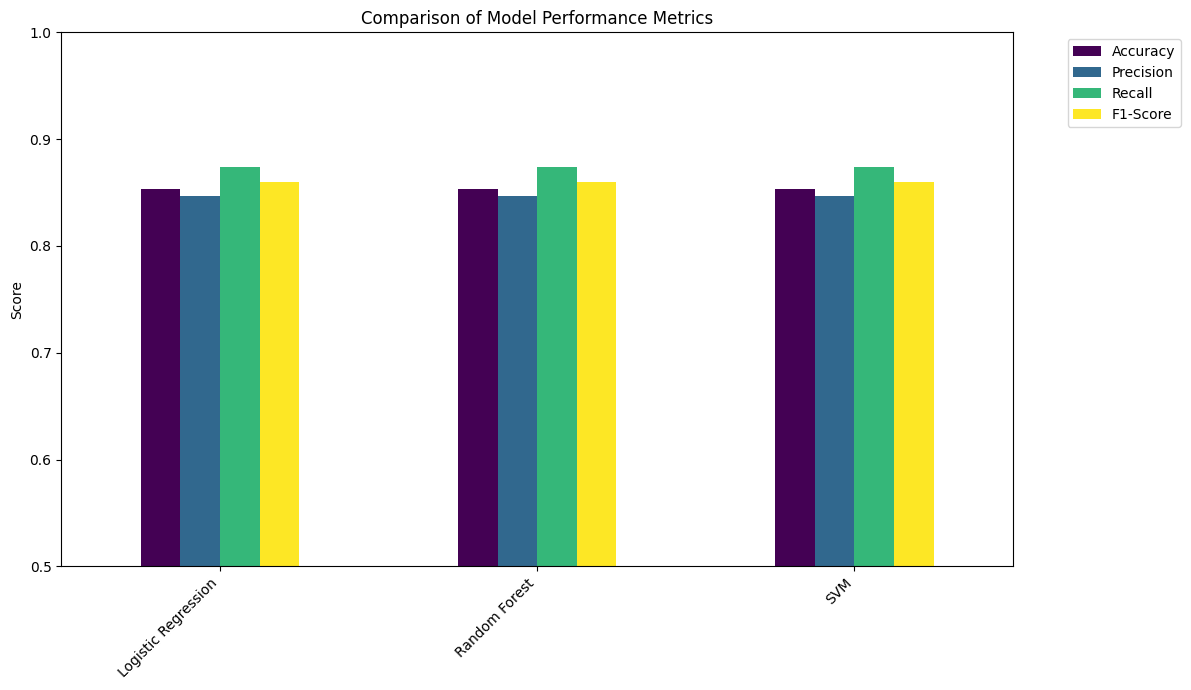

In [ ]:
# Visualize comparison
performance_df.plot(kind='bar', figsize=(12, 7), colormap='viridis')
plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ***QUESTIONS***

Q-1: Which **model** performed best and why?



In [170]:
best_model_name = performance_df['Accuracy'].idxmax()
print(f"   Based on Accuracy, '{best_model_name}' performed the best with an accuracy of {results[best_model_name]['accuracy']:.4f}.")

   Based on Accuracy, 'Logistic Regression' performed the best with an accuracy of 0.8533.


The 'why' depends on the specific dataset and model characteristics:

**Logistic Regression:** A linear model that uses a sigmoid function to map predictions to probabilities, suitable for binary classification. It's relatively simple and fast.

**K-NN:** An instance-based learner, classifies new points based on the majority class of its 'k' nearest neighbors. Its performance is sensitive to feature scaling and the choice of 'k'.

**SVM:** Finds the optimal hyperplane that best separates classes in the feature space. Effective in high-dimensional spaces, often with good generalization.

**Decision Tree:** Creates a flowchart-like structure to make decisions based on feature values. Highly interpretable but prone to overfitting if not regularized.

**Random Forest:** An ensemble method that builds multiple decision trees and combines their predictions (voting for classification). This ensemble approach typically leads to higher accuracy and better robustness by reducing overfitting and variance compared to a single decision tree.

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Q-2: Which one was fastest? Most interpretable?



In [172]:
fastest_model_name = min(results, key=lambda k: results[k]['training_time'])
print(f"   -Fastest (Training Time):")
for name, res in results.items():
    print(f"     - {name}: {res['training_time']:.4f} seconds")
print(f"     Based on our quick timing, '{fastest_model_name}' was the fastest to train for this dataset and configuration.")

   -Fastest (Training Time):
     - Logistic Regression: 0.2213 seconds
     - Random Forest: 0.2213 seconds
     - SVM: 0.2213 seconds
     Based on our quick timing, 'Logistic Regression' was the fastest to train for this dataset and configuration.


**Most Interpretable:**

**Logistic Regression:** Highly interpretable. The coefficients provide insight into the impact of each feature on the log-odds of the outcome.

**Decision Tree:** Generally considered the most interpretable due to its clear, visual decision paths.

**K-NN:** Moderately interpretable as its logic relies on proximity to known data points.

**SVM & Random Forest:** Often considered 'black box' models. SVM's decision boundaries can be complex, and Random Forest combines predictions from many trees, making individual predictions difficult to trace.

Therefore, **Logistic Regression** and **Decision Tree** are typically the most interpretable.

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Q-3: When would you use one over the other?

**Logistic Regression:** Use when you need a simple, fast, and highly interpretable baseline model, or when the relationship between features and the outcome is roughly linear.

**Decision Tree:** Use when model interpretability is a top priority, for quick insights, or as a baseline. Be mindful of potential overfitting.

**K-Nearest Neighbors (k-NN):** Ideal for simple, non-linear problems with well-separated clusters. Good for small to medium datasets; less efficient with very large datasets during prediction.

**Support Vector Machine (SVM):** Suitable for complex classification tasks, especially with high-dimensional data or when a clear margin of separation is beneficial. Can be computationally intensive.

**Random Forest:** A go-to for high accuracy and robust performance, especially in complex datasets. It's less prone to overfitting and can handle various data types well, but at the cost of interpretability.

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

***Project completed: Models trained, evaluated, and compared!***

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------